Handling Imbalanaced Dataset


upsmapling

downsmapling

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns

In [59]:
#creating a dataframe of 1000 smaples
np.random.seed(155)
n_smaple=1000
class_0_ratio=0.9
n_class_0=int(n_smaple*class_0_ratio)
n_class_1=n_smaple-n_class_0




In [60]:
class1=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0})

In [61]:
class2=pd.DataFrame({
    'feature1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1})

<Axes: xlabel='feature2', ylabel='Count'>

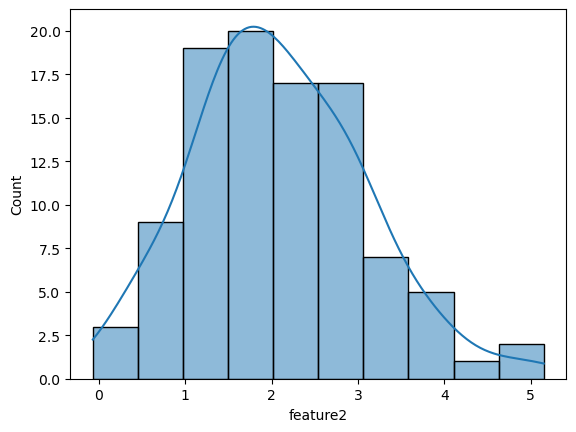

In [62]:
sns.histplot(class2['feature2'],kde=True)

In [63]:
import matplotlib.pyplot as plt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15376\2772198338.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class2['feature2'],hist=False) # not used now


<Axes: xlabel='feature2', ylabel='Density'>

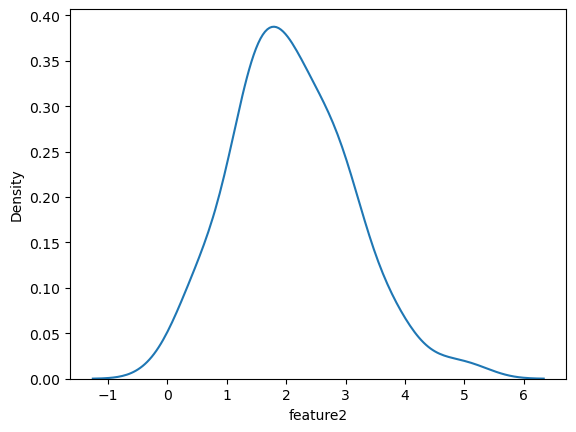

In [64]:
sns.distplot(class2['feature2'],hist=False) # not used now
# plt.show()

In [65]:
df=pd.concat([class1,class2])
df

,feature1,feature2,target
0,0.624351,-0.762606,0
1,0.225837,1.034433,0
2,0.416190,1.966870,0
3,-1.127737,0.272299,0
4,-0.120359,-0.042018,0
...,...,...,...
95,0.739313,1.219451,1
96,2.490824,1.867352,1
97,2.554752,2.040893,1
98,1.893642,1.457170,1


In [66]:
df.reset_index(drop=True)

,feature1,feature2,target
0,0.624351,-0.762606,0
1,0.225837,1.034433,0
2,0.416190,1.966870,0
3,-1.127737,0.272299,0
4,-0.120359,-0.042018,0
...,...,...,...
995,0.739313,1.219451,1
996,2.490824,1.867352,1
997,2.554752,2.040893,1
998,1.893642,1.457170,1


In [68]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [72]:
#Upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]


In [74]:
from sklearn.utils import resample
df_upsampled_minority=resample(df_minority,replace=True,#sample with replacement
         n_samples=len(df_majority),random_state=42)

In [75]:
df_upsampled_minority.shape

(900, 3)

In [79]:
df_upsmapled=pd.concat([df_majority,df_upsampled_minority])
df_upsmapled

,feature1,feature2,target
0,0.624351,-0.762606,0
1,0.225837,1.034433,0
2,0.416190,1.966870,0
3,-1.127737,0.272299,0
4,-0.120359,-0.042018,0
...,...,...,...
52,1.898538,2.891177,1
65,4.200011,1.108204,1
76,2.165799,2.380637,1
42,2.136017,1.535121,1


In [80]:
df_upsmapled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

UnderSampling

In [82]:
class1=pd.DataFrame({'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
                     'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
                     'target':[0]*n_class_0})
class2=pd.DataFrame({'feature1':np.random.normal(loc=0,scale=1,size=n_class_1),
                     'feature2':np.random.normal(loc=0,scale=1,size=n_class_1),
                     'target':[1]*n_class_1})

In [85]:
df=pd.concat([class1,class2])

In [89]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [93]:
#undersampling
df_under_majority=resample(df_majority,n_samples=len(df_minority),random_state=42)
df_under_majority.shape

(100, 3)

In [98]:
df_undersampled=pd.concat([df_under_majority,df_minority])
df_undersampled.target.value_counts()

target
0    100
1    100
Name: count, dtype: int64